# K-nearest neighbors example

Based on [this](https://www.youtube.com/watch?v=r_D5TTV9-2c&index=19&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v ) tutorial by **sentdex** .

Example based on [this dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29). By the way, copy of that file you can find in github folder near that script.

I've decided to extend tutorial a little bit and make it more obvious. Mainly its about Dataset representation.

In [11]:
# Some imports

import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'], 1))
X = StandardScaler().fit_transform(X) # Added scaling to perform PCA better
y = np.array(df['class'])

c:\python3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Lets visualize entire dataset to get better view of data.

This code based on [this tutorial](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60).

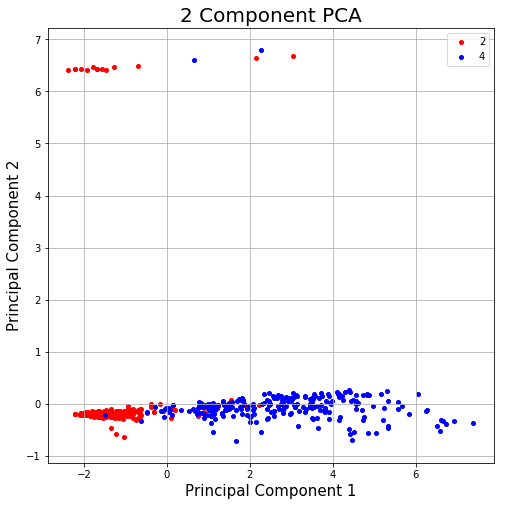

In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df['class']], axis = 1)
#print(finalDf.head())


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

classes = [2, 4]
colors = ['r', 'b']
for target, color in zip(classes,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 16)
ax.legend(classes)
ax.grid()
plt.show()

Lets also print variance ratio, that shows how much data covers this PCA components

In [5]:
print('Variance ratio: ', pca.explained_variance_ratio_)

Variance ratio:  [0.58676832 0.11178776]


In [28]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9357142857142857


**======================**

Lets see, where located wrong classified datapoints.

I'm new in Scikit framework, so maybe its not the best code to do that.

**=======================**

In [29]:
print('Size of the dataset is:', len(X))
wrong_predicted = []
wrong_predicted_labels = [] # Yeah, its could be done in one dictionary or array. Just wanna to make it easy to plot.

predictions = clf.predict(X_test)
for input_, prediction, label in zip(X, predictions, y_test):
  if prediction != label:
    wrong_predicted.append(input_)
    wrong_predicted_labels.append(label)

print('Size of the test set:', len(X_test))
print('Wrong predicted:', len(wrong_predicted))

Size of the dataset is: 699
Size of the test set: 140
Wrong predicted: 9


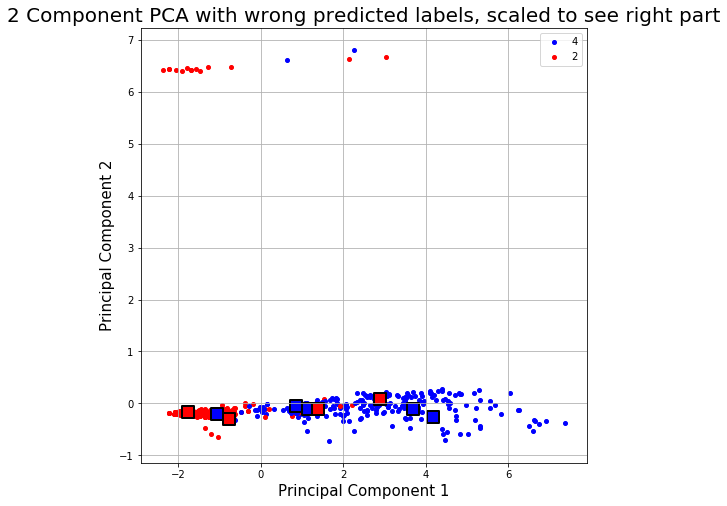

In [42]:
# This code is shitty as hell

overall_x = np.concatenate((X_train, X_test, wrong_predicted), axis=0) # Just because we've shuffled array
overall_y = np.concatenate((y_train, y_test, wrong_predicted_labels), axis=0) # Just because we've shuffled array

principalComponents = pca.fit_transform(overall_x)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA with wrong predicted labels, scaled to see right part', fontsize = 20)

classes = [4, 2]
colors = ['r', 'b']

for i in range(len(X_train) + len(X_test)):
    
    if overall_y[i] == 2:
        color = colors[0]
    elif overall_y[i] == 4:
        color = colors[1]
    
    ax.scatter( principalComponents[i][0], principalComponents[i][1]
                , c = color
                , s = 16)
    
for i in range(len(wrong_predicted)):
    if overall_y[-i] == 2:
        color = colors[0]
    elif overall_y[-i] == 4:
        color = colors[1]
    ax.scatter( principalComponents[-i][0], principalComponents[-i][1], marker='s', edgecolor='black' , linewidth='2', c = color, s = 150)
    
    
ax.legend(classes)
ax.grid()
#plt.ylim(-1, 1)
#plt.xlim(0, 4.5)
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('red')
#plt.savefig('right_part.png', bbox_inches='tight')
#plt.show()

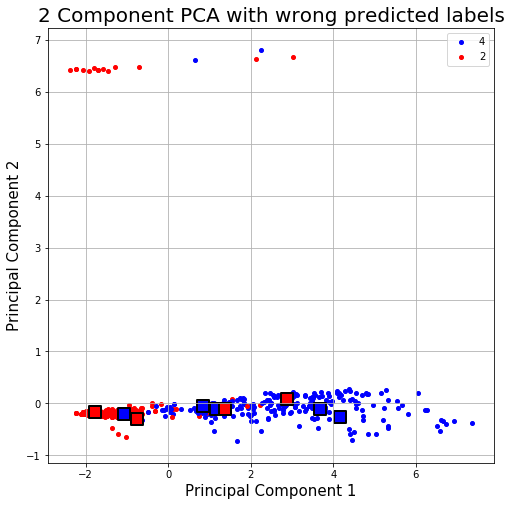

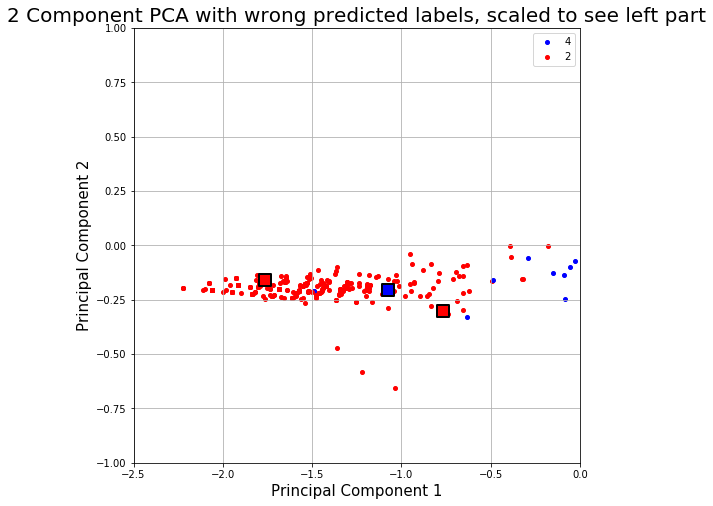

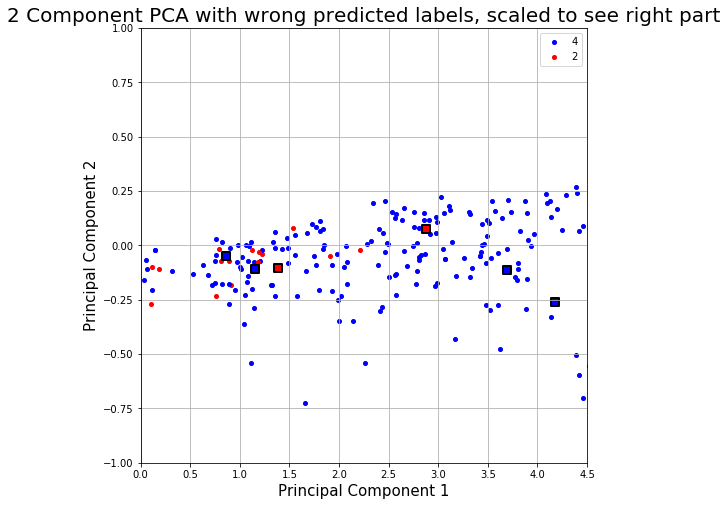

In [41]:
import IPython.display as dp

# create list of image objects
fs = ['full_scale.png', 'left_part.png', 'right_part.png']
images = []
for ea in fs:
    images.append(dp.Image(filename=ea, format='png'))

# display all images
for ea in images:
    dp.display_png(ea)

### Results explanation
I've run classifier few times, to get the worst accuracy(to get a lot of wrong points). Then I've displayed the wrong classified points as 'square', with color, that **SHOULD BE THERE** but **ITS NOT**. So, as you see, few datapoints located in the red datapoints, but should be blue and vice versa. Nevertheless there are few strange points exists. Probably we should look at the train and test dataset separately, but i'm too lazy to do that.

Hope that shitty piece of code helped someone.